In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [6]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364239  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009922  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052433  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002808  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024071  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224964  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249123  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345768  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382027  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756565  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104458  
2006-01-04   31.799999  31.530001  10870000.0  19.871273  
2006-01-05   31.500000  31.495001  10158000.0  19.849209  
2006-01-06   31.580000  31.680000   8403800.0  19.965792  
2006-01-09   31.674999  31.674999   5619600.0  19.962652  

[5 rows x 36 columns]

### EDA
Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on Multi-Level Indexing and Using .xs. Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

What is the max Close price for each bank's stock throughout the time period?

In [9]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.

In [11]:
returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [13]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

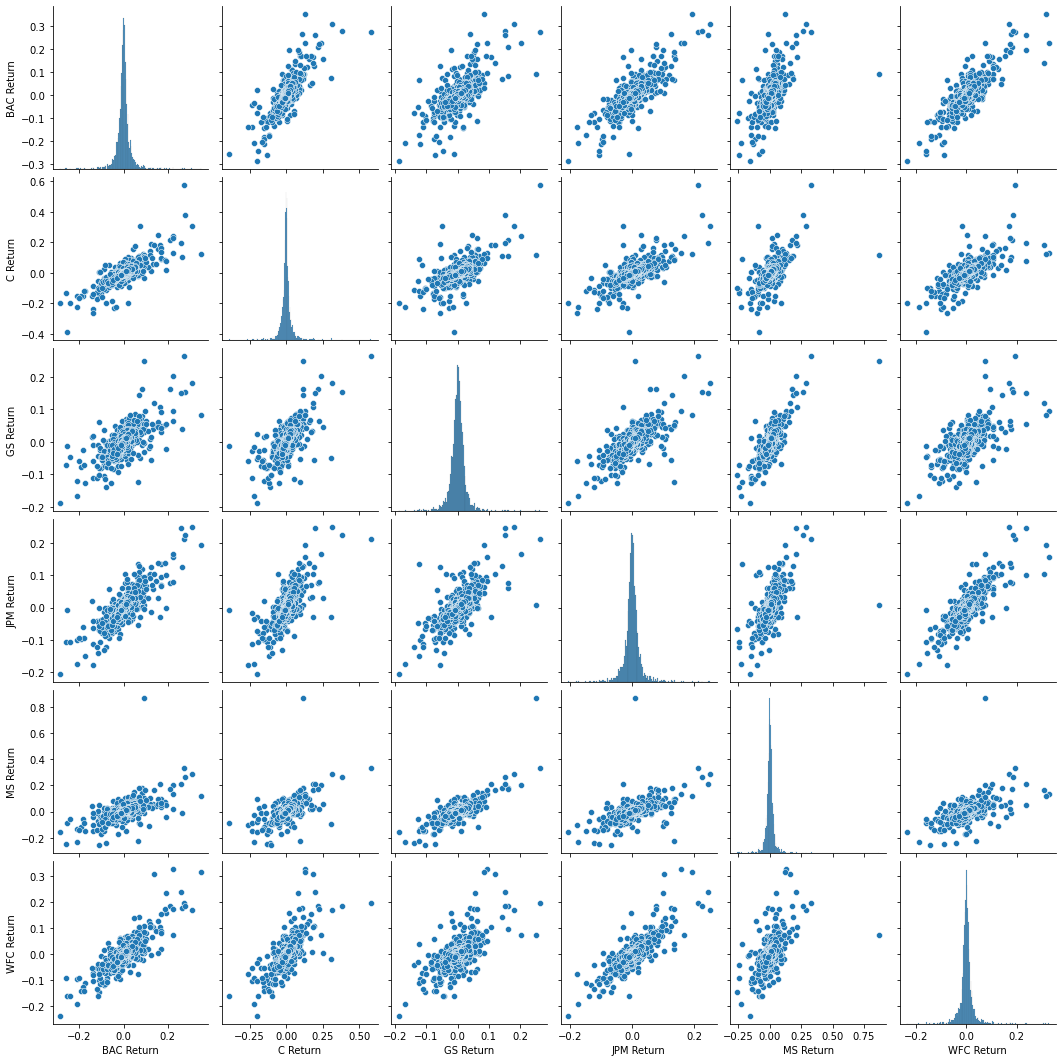

In [14]:
import seaborn as sns
sns.pairplot(returns[1:])

Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [15]:
# Worst Drop (4 of them on Inauguration day)

returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?

In [16]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [17]:
returns.std() 
#citigroup is the riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [20]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Create a distplot using seaborn of the 2015 returns for Morgan Stanley

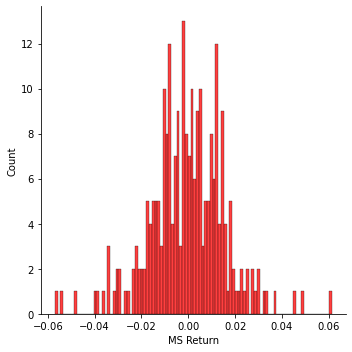

In [24]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='red',bins=100)

Create a distplot using seaborn of the 2008 returns for CitiGroup

C:\Users\gpoon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

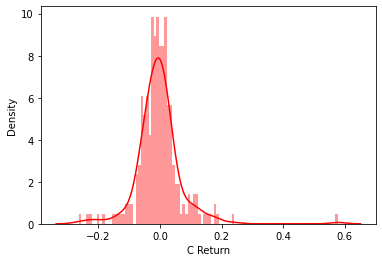

In [23]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)